In [83]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
X, y = datasets.make_classification(
    n_samples=20,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=2
)

In [85]:
# train_class_df = pd.concat([pd.DataFrame(X, columns=['col1', 'col2']), pd.DataFrame(y, columns=['target'])], axis=1)
train_class_df = pd.DataFrame({'col1' : X[:, 0], 'col2' : X[:, 1], 'target' : y})

In [86]:
train_class_df.head()

,col1,col2,target
0,0.243067,-0.527341,1
1,0.964178,-0.375839,0
2,-1.084861,0.008476,1
3,-0.906538,3.385162,1
4,1.332800,1.256292,1


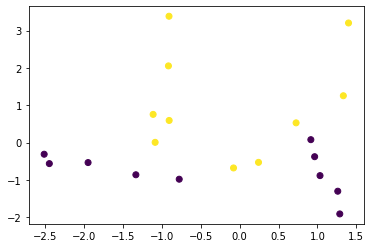

In [87]:
plt.scatter(train_class_df['col1'], train_class_df['col2'], c=train_class_df['target'])

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
logic_model = LogisticRegression()

In [90]:
logic_model.fit(X, y)

LogisticRegression()

In [91]:
pred_log_model = logic_model.predict(X)

In [92]:
pd.DataFrame({'predict_y' : pred_log_model, 'true_y' : y}).head()

,predict_y,true_y
0,0,1
1,0,0
2,0,1
3,1,1
4,1,1


# Доля правильных ответов Accuracy
## $accuracy(a, x) = \frac{1}{l} \sum_{i=1}^{l} [a(x_i) = y_i]$
## accuracy = 0 плохо , accuracy = 1 хорошо

In [93]:
from sklearn.metrics import accuracy_score

### точность модели pred_log_model через accuracy

In [94]:
accuracy_score(y, pred_log_model)

0.8

# PRECISION, RECALL

In [95]:
from sklearn.metrics import confusion_matrix

![jupyter](./confusion_matrix.png)

In [96]:
pd.DataFrame(confusion_matrix(y, pred_log_model), columns=['TF', 'FT'], index=['Positive', 'Negative'])

,TF,FT
Positive,9,1
Negative,3,7


Доля истинных срабатываний от общего количества срабатываний. На сколько можно доверять алгоритму в случае срабатывания.
### $precision(a, X) = \frac{TP}{TP + FP}$
Доля обьектов истинно относящихся к классу 1
### $recall(a, X) = \frac{TP}{TP + FN}$


In [97]:
from sklearn.metrics import precision_score, recall_score

### precision говорит как много едениц выставленно правильно
то есть если не хотим рисковать и выставлять проверенные 1

In [98]:
precision_score(y, pred_log_model)

0.875

### recall говорит что не было пропущенно ни одной еденицы

In [99]:
recall_score(y, pred_log_model)

0.7

### $F_1 = \frac{2 * precision * recall}{precision + recall}$

In [100]:
from sklearn.metrics import f1_score, fbeta_score

In [101]:
rc = recall_score(y, pred_log_model)
pr = precision_score(y, pred_log_model)
print((2 * pr * rc) / (pr + rc))

0.7777777777777777


In [102]:
f1_score(y, pred_log_model)

0.7777777777777777

### $F_\beta =(1 + \beta^2)\frac{precision * recall}{\beta^2 * precision + recall}$
$b > 1$ Важнее recall
$b < 1$ важнее precision

In [103]:
fbeta_score(y, pred_log_model, beta=1)

0.7777777777777777

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y, pred_log_model))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



In [109]:
from sklearn.metrics import roc_curve, auc

In [111]:
fpr, tpr, thresholds = roc_curve(y, pred_log_model)

Text(0, 0.5, 'TPR')

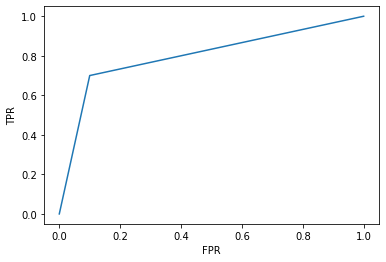

In [114]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [115]:
auc(fpr, tpr)

0.8

In [116]:
from sklearn.metrics import roc_auc_score

In [117]:
roc_auc_score(y, pred_log_model)

0.8